#**PROJECT TITLE :- PRCP-1012-GameWinnerPred**

###**Team Id :- PTID-CDS-SEP-22-1376**

# **Contents**

1.   Introduction
2.   Problem Statement
3.   Background of the Project
4.   Project Usecase
5.   Importing Libraries
6.   Loading the Data
7.   Reduce Memory Usage
8.   Domain Analysis
9.   Basic Checks
10.   Exploratory Data Analysis
     - Univariate Analysis
     - Bivariate Analysis
     - Multivariate Analysis
11.   Data Preprocessing
     - Encoding Categorical Variables using One Hot Encoding
12.  Splitting into independent(X) and dependent(y) features.
     - Spliting the Data into Test Train Splits
13.  Feature Scalling
14.  Model Selection 
     
     1.LinearRegression
       -Model Training
       -Model Evaluation

     2.XGBRegressor
       -Model Training
       -Model Evaluation
15.  Conclusion
16.  Challenges Faced




# 1.Introduction

PUBG stands for PlayerUnkown’s Battlegrounds, which is a multiplayer game that is available on various platforms which are Windows, Android, IOS, etc. The game features different modes, the three different modes are Classic, Arcade, and EvoGround. In classic, the player will be provided with different maps that range from Erangel, Miramar, Sanhok, and Vikendi. In the arcade mode, there are War, Mini-Zone, Quick Match, and Sniper Training. There are 555 Million Players worldwide playing PUBG on all different platforms, with this huge number comes the ranking difficulty. The basic match of Battle Royal consists of 100 people playing a match with only 1 Winner (who can have Chicken Dinner). Ranking these players on basis of different attributes becomes difficult as there is a possibility of some players with more than one similar ranking. Here’s where machine learning comes in handy by analyzing various attributes and understanding the similarities between each to predict the ranking of players based on the trained model. The dataset acquired for the training and testing purpose is from Kaggle which is an open-source platform for gathering data related to different use cases, where they combined various matches (SOLO, SQUAD, DUO) with all different sets of attributes for understanding the use case.



# 2.Problem Statement

we are provided with a large number of anonymized PUBG dataset. Each row contains one player's post-game stats. we have to Create a model which predicts players finishing placement based on their final stats, on a scale from 1(first place) to 0 (last place).

# 3.Background of the Project

In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.

  You are provided with a large number of anonymized PUBG game stats, formatted so that each row contains one player's post-game stats. The data comes from matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 player per group.
  
You must create a model which predicts players' finishing placement based on their final stats, on a scale from 1 (first place) to 0 (last place).

# 4.Project Usecase

A team or a player can develop a statergies on the basis of the data of the players who are winning.The target is “a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. 


# 5.Importing the Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import itertools

# 6.Loading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Game Ai Project/pubg.csv")

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


# 7.Reduce Memory Usage

The size of the PUBG dataset is pretty big for a lower/mid-range laptops so here's a script to make the dataset smaller without losing information.

It uses the following approach:
- Iterate over every column
- Determine if the column is numeric
- determine if the column can be represented by an integer
-find the min and the max value
- Determine and apply the smallest datatype that can fit the the range of values

This reduces the dataset.



In [ ]:
# memory saving function 
def reduce_memory_usage(data):
  """Iterate through all the columns of a dataframe and modify the data type
     to reduce memory usage.
     
 """
  start_mem = data.memory_usage().sum()/1024**2
  for col in data.columns:
    col_type = data[col].dtype

    if col_type != object:
      c_min = data[col].min()
      c_max = data[col].max()
      if str(col_type)[:3] == 'int':
        if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
          data[col] = data[col].astype(np.int8)
        elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
          data[col] = data[col].astype(np.int16)
        elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
          data[col] = data[col].astype(np.int32)
        elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
          data[col] = data[col].astype(np.int64)
      else:
        if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
          data[col] = data[col].astype(np.float32)
        else:
          data[col] = data[col].astype(np.float64)

  end_mem = data.memory_usage().sum()/1024**2
  print("Memory Usage of Dataframe is {:.2f} MB --> Reduced to --> {:.2f} MB (Decreased by {:.1f}%)".format(start_mem ,end_mem , 100*(start_mem - end_mem)/start_mem))
  
    




In [ ]:
reduce_memory_usage(data)

Memory Usage of Dataframe is 983.90 MB --> Reduced to --> 339.28 MB (Decreased by 65.5%)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int8   
 4   boosts           int8   
 5   damageDealt      float32
 6   DBNOs            int8   
 7   headshotKills    int8   
 8   heals            int8   
 9   killPlace        int8   
 10  killPoints       int16  
 11  kills            int8   
 12  killStreaks      int8   
 13  longestKill      float32
 14  matchDuration    int16  
 15  matchType        object 
 16  maxPlace         int8   
 17  numGroups        int8   
 18  rankPoints       int16  
 19  revives          int8   
 20  rideDistance     float32
 21  roadKills        int8   
 22  swimDistance     float32
 23  teamKills        int8   
 24  vehicleDestroys  int8   
 25  walkDistance     float32
 26  weaponsAcquired  int16  
 27  winPoints   

# 8.Domain analysis

The dataset comprises of anonymised player data

The Dataset comes in the form of a .csv file. This file contains 4,446,996 rows and 29 columns.
- Id - Id to identify a player.
- GroupId - Id to identify a group within a match. if the same group of players plays in different matches,they will have a different groupid each time.
- matchid - Id to identify match.
- assists - Number of times player helped a teammate when he killed an enemy 
- boosts - Number of boost item used.
what is boost ?
Boost may refer to energy drink,pain killers,adrenaline syringe.
About: The boost bar is a thin white line visible above the health bar. it is cut into 4 sections,which fill up when the player uses a boost item.The first section of the boost bar lasts for 1 minute and will heal 1% health every 8 seconds,for a total of 7% health.
- damagedealt - Total damage dealt.Note:self inflicted damage is subtracted.
- DBNOs - Number of enemy players knocked
what is DBNOs ?
stands for 'Down But No Out'.During Duo or squad play,when you lose all you hit points(HP),you get into this mode. in this mode,your duo or squad members can eal you and that is why we don't count this as an out. 'Revive State' is a feature in BATTLEGROUNDS that can be used to revive downed squad mates. once your HP reaches 0 you will go into a DBNO state. you can only crawl and drop items,but you cannot shoot or use items while in this state.
- headshotKills - Number of enemies you killed with headshots.
- heals - Number of healing items used.
About: There are three basic health items in PUBG :Bandages,First Aid kits and Med kits. There all restore your health bar.
- killPlace - your ranking in match in terms of number of enemy players killed.
- killPoints - Kill-based external ranking of player.(Ranking where only winning matters.)
- kills - Number of enemy players killed.
- killStreaks - Max number of enemy player killed in a shor amount of time.A killStreak is earned when a player acquires a certain number of kills in a row without dying.
- longestKill - longest distance between player and player killed at time of death. this may be misleading, as downing a-player and driving away may lead to a large longestkill stat.
- matchDuration - The time duration in which the player has survived in a match.
- matchType - Type of the match the player is plying currently
  - Type of the matches in pubg are:
      - squad-fpp 
      - duo
      - solo-fpp
      - squad
      - duo-fpp
      - solo
      - normal-squad-fpp
      - crashfpp
      - flaretpp
      - normal-solo-fpp
      - flarefpp
      - normal-duo-fpp
      - normal-duo
      - normal-squad
      -crashtpp
      - squad-f
- maxPlace - worst placement we have data for in the match. This may not match with numgroups , as sometimes the data skips over 
- numGroups - number of groups we have data for in the match.
- rankPoints - elo points gained by the player on the basis of rank he got in the match.
- revives - Number of times you revived your teammates.
- rideDistance - total Distance travelled in vechicles(measured in meters).
- roadKills - Number of enemy killed while travelling in a vechicle.
- swimDistance - Total Distances travelled by swimming (measured in meters).
- teamKills - Number of times you are killed your teammates.
- vehicleDstroys - Number of vehicle destroyed.
- walkDistance - Total distance travelled on foot(measured in meters).
- weaponsAcquired - number of weapons picked up.
- winPoint - win-based external ranking of player.(ranking where only winning matters).
- winplacePerc - The target of prediction (target Variable).this is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match.It is calculated off of maxplace, not numGroups, so it is possible to have missing chunks in a match.

 


# 9.Basic checks

1.what is the shape of the dataset ?

In [ ]:
data.shape

(4446966, 29)

2.How does the data look like ?

In [ ]:
data.sample(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1375684,19b4e811aa7bef,60425e86f76057,d1d6f677bbe3f9,0,0,0.000000,0,0,0,87,1333,0,0,0.000000,1375,squad-fpp,29,27,-1,0,0.0,0,0.0,0,0,26.400000,0,1667,0.0000
1661915,4a6e3b663c1643,d36187ccf27049,06cb22535d99ab,0,0,0.000000,0,0,0,61,1036,0,0,0.000000,1416,duo-fpp,44,44,-1,0,0.0,0,0.0,0,0,283.299988,6,1491,0.4186
3822858,a32bce23078504,2c89036ffef13c,cbd50ec9a0dfb8,0,0,42.570000,0,0,0,80,0,0,0,0.000000,1982,solo-fpp,97,96,1500,0,0.0,0,0.0,0,0,97.330002,4,0,0.1771
2974788,5ffada397d8cdb,1f89c158fd8fd4,d67d489d383260,2,7,426.700012,2,1,3,8,0,3,1,61.880001,1934,duo-fpp,47,45,1489,0,0.0,0,0.0,0,0,3267.000000,5,0,0.8913
3450990,24ded78277409c,a227aac7bf575a,5402ee21b027f3,0,7,0.000000,0,0,3,49,0,0,0,0.000000,1368,solo-fpp,99,96,1510,0,0.0,0,0.0,0,0,2233.000000,5,0,0.9388


3.What are the datatype of the column?

4.what is the total no. of entries in our dataset?

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int8   
 4   boosts           int8   
 5   damageDealt      float32
 6   DBNOs            int8   
 7   headshotKills    int8   
 8   heals            int8   
 9   killPlace        int8   
 10  killPoints       int16  
 11  kills            int8   
 12  killStreaks      int8   
 13  longestKill      float32
 14  matchDuration    int16  
 15  matchType        object 
 16  maxPlace         int8   
 17  numGroups        int8   
 18  rankPoints       int16  
 19  revives          int8   
 20  rideDistance     float32
 21  roadKills        int8   
 22  swimDistance     float32
 23  teamKills        int8   
 24  vehicleDestroys  int8   
 25  walkDistance     float32
 26  weaponsAcquired  int16  
 27  winPoints   


5.Are there any missing values ?

In [ ]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

One missing value is present in the target variable(winPlacePerc) column , so we are removing that row.

Finding the row where value is missing

In [ ]:
data[data['winPlacePerc'].isnull()==True]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,0,0,0.0,9,solo-fpp,1,1,1574,0,0.0,0,0.0,0,0,0.0,0,0,NaN


Removing the row where missing value is present.

In [ ]:
data.drop(labels=2744604,inplace=True)

In [ ]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

There are no more missing values

6.How does the data looks statastically?

In [ ]:
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06
mean,2.338150e-01,1.106908e+00,1.307171e+02,6.578757e-01,2.268196e-01,1.370148e+00,4.759936e+01,5.050062e+02,9.247835e-01,5.439553e-01,2.299760e+01,1.579507e+03,4.450468e+01,4.300760e+01,8.920103e+02,1.646590e-01,6.061160e+02,3.496092e-03,4.509324e+00,2.386841e-02,7.918209e-03,1.154218e+03,3.660488e+00,6.064603e+02,4.728217e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746293e+01,6.275049e+02,1.558445e+00,7.109721e-01,5.097262e+01,2.587388e+02,2.382810e+01,2.328949e+01,7.366478e+02,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261158e-02,1.183497e+03,2.456543e+00,7.397005e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.330000e+02,2.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,2.132000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,1.910000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.094000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


7.Are there any duplicate values?

In [ ]:
data.duplicated().sum()

0

8.How is the correlation between columns ?

In [ ]:
data.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.307683,0.406726,0.301057,0.198289,0.228556,-0.290062,0.039066,0.319690,0.243471,0.261425,-0.019450,-0.147916,-0.146805,-0.016407,0.198320,0.110644,0.011903,0.023372,0.006081,0.057921,0.290305,0.243882,0.024014,0.299441
boosts,0.307683,1.000000,0.521947,0.358907,0.334661,0.535854,-0.554844,0.008347,0.502024,0.405327,0.423290,0.072107,-0.013686,-0.012929,0.023202,0.253125,0.328855,0.035124,0.107993,0.013068,0.087387,0.640150,0.406609,-0.007645,0.634234
damageDealt,0.406726,0.521947,1.000000,0.735763,0.613409,0.342987,-0.677398,0.049904,0.888783,0.703599,0.563837,-0.006756,-0.040708,-0.040079,-0.001459,0.256951,0.140883,0.052487,0.036729,0.015468,0.081182,0.398199,0.353248,0.017762,0.440507
DBNOs,0.301057,0.358907,0.735763,1.000000,0.469923,0.265485,-0.555290,0.042616,0.707848,0.646872,0.451422,-0.014486,-0.267710,-0.265789,-0.003451,0.300999,0.102537,0.036093,0.017320,0.069430,0.060210,0.284660,0.218161,0.011108,0.279970
headshotKills,0.198289,0.334661,0.613409,0.469923,1.000000,0.199917,-0.469829,0.023988,0.674275,0.512882,0.447261,-0.017657,0.009211,0.009389,0.005119,0.150145,0.076495,0.013369,0.028531,0.008658,0.039200,0.250982,0.217552,0.004982,0.277722
heals,0.228556,0.535854,0.342987,0.265485,0.199917,1.000000,-0.386032,-0.002585,0.311781,0.270412,0.263278,0.108901,-0.064759,-0.064204,0.019142,0.236680,0.297484,0.024619,0.079587,0.035386,0.062870,0.430266,0.309071,-0.010990,0.427857
killPlace,-0.290062,-0.554844,-0.677398,-0.555290,-0.469829,-0.386032,1.000000,-0.023278,-0.730499,-0.810517,-0.541146,-0.005806,0.016791,0.018786,-0.014805,-0.269804,-0.236202,-0.057356,-0.089396,-0.037797,-0.073569,-0.590236,-0.490144,-0.002415,-0.719069
killPoints,0.039066,0.008347,0.049904,0.042616,0.023988,-0.002585,-0.023278,1.000000,0.036192,0.037091,0.014084,-0.099542,-0.044802,-0.042367,-0.975555,0.012041,-0.029316,-0.004156,-0.004604,-0.039739,-0.009658,0.004630,-0.003978,0.983417,0.012908
kills,0.319690,0.502024,0.888783,0.707848,0.674275,0.311781,-0.730499,0.036192,1.000000,0.802500,0.602936,-0.030688,-0.004847,-0.004060,0.008200,0.253323,0.114750,0.063651,0.039127,0.017601,0.079991,0.374774,0.336414,0.006929,0.419916
killStreaks,0.243471,0.405327,0.703599,0.646872,0.512882,0.270412,-0.810517,0.037091,0.802500,1.000000,0.515097,-0.034645,-0.037339,-0.036054,0.003426,0.241695,0.098420,0.065575,0.034588,0.027612,0.064374,0.327639,0.275373,0.008552,0.377566


In [ ]:
data.corr()['winPlacePerc']

assists            0.299441
boosts             0.634234
damageDealt        0.440507
DBNOs              0.279970
headshotKills      0.277722
heals              0.427857
killPlace         -0.719069
killPoints         0.012908
kills              0.419916
killStreaks        0.377566
longestKill        0.410154
matchDuration     -0.005171
maxPlace           0.037377
numGroups          0.039621
rankPoints         0.013523
revives            0.240881
rideDistance       0.342915
roadKills          0.034544
swimDistance       0.149607
teamKills          0.015943
vehicleDestroys    0.073436
walkDistance       0.810888
weaponsAcquired    0.583806
winPoints          0.007061
winPlacePerc       1.000000
Name: winPlacePerc, dtype: float64

# 10.Exploratory Data Analysis


## Univariate Analysis

In [ ]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

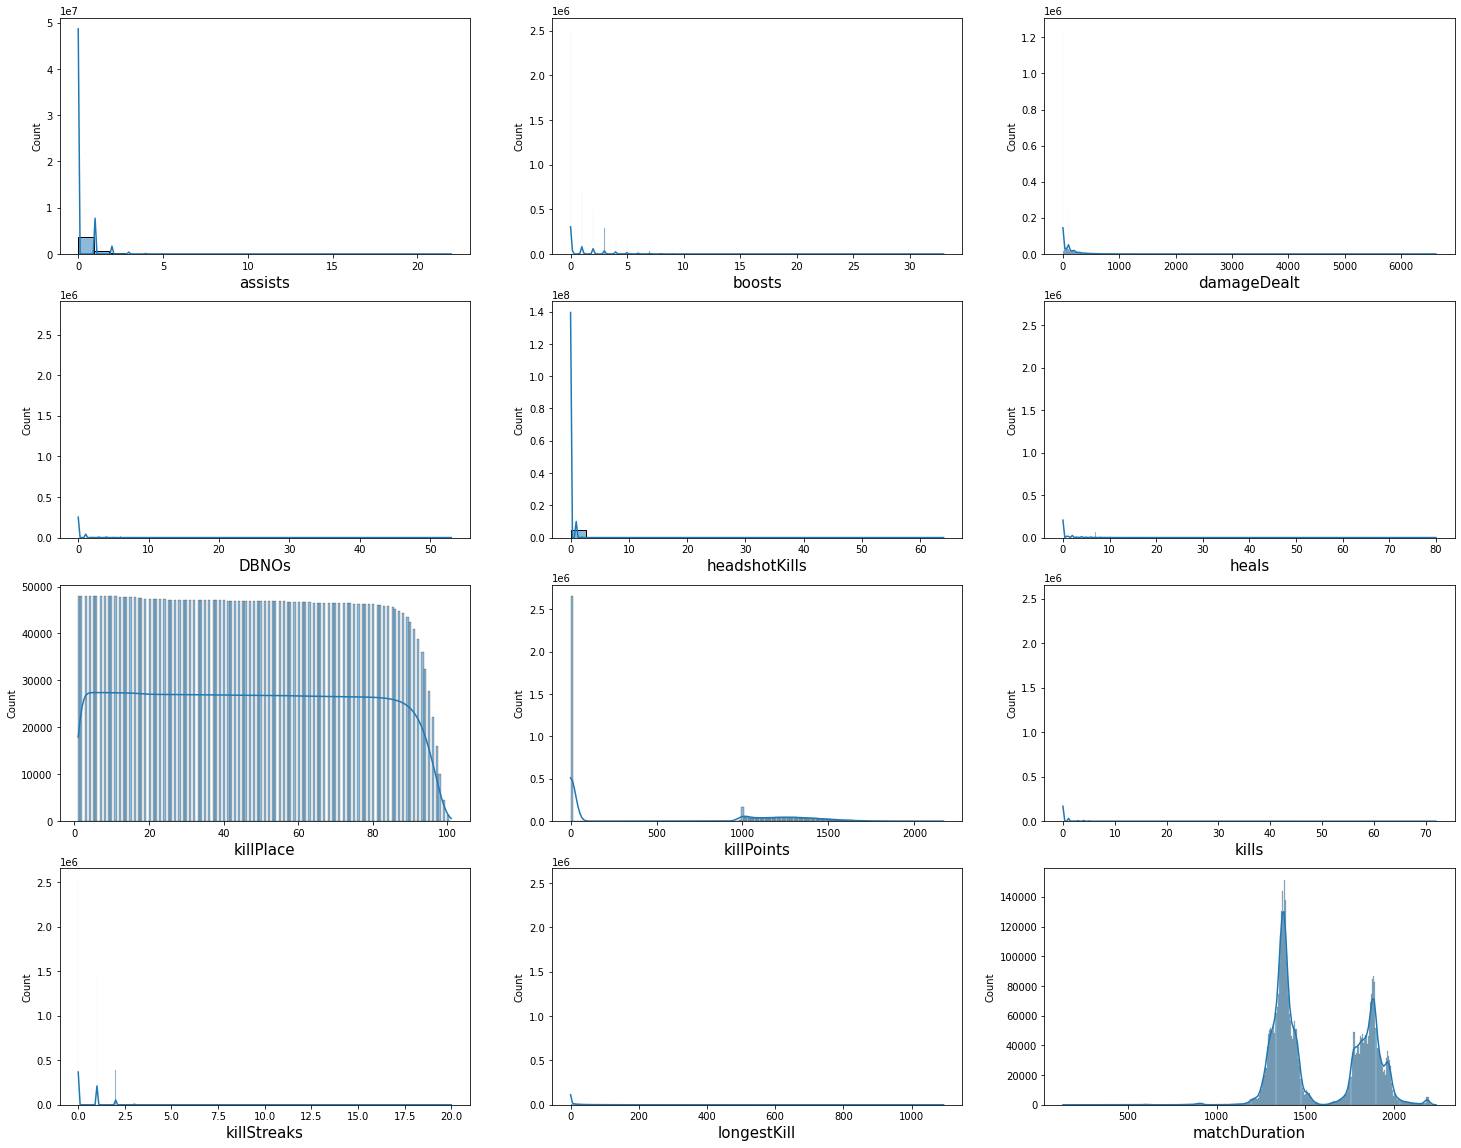

In [ ]:
plt.figure(figsize=(25,20))
plotnumber = 1

for column in data.columns[3:15]:

  if plotnumber<=12:
    ax = plt.subplot(4,3,plotnumber)
    sns.histplot(x=column,data=data,kde=True,)
    plt.xlabel(column,fontsize=15)

  plotnumber+=1

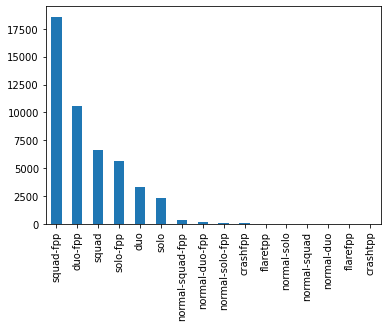

In [ ]:
data.groupby('matchId')['matchType'].first().value_counts().plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Kill Count')

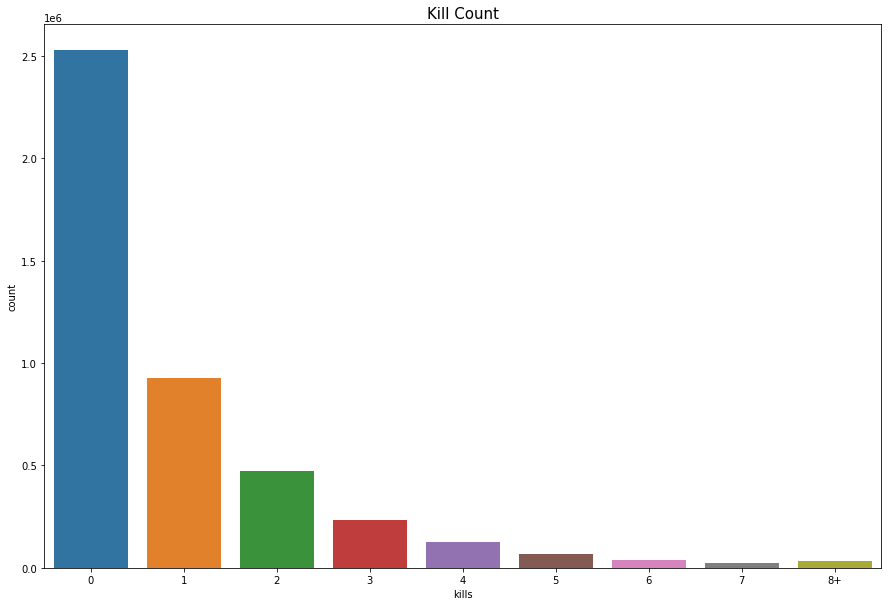

In [ ]:
data1 = data.copy()
data1.loc[data1['kills'] > data1['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data1['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)

Most of the player did not even take a single kill,

now we will check whether those players atleast inflicted some damage or not.

The first thing we explored was how common features influenced the win percentage placement (our target variable). Some correlated features that we found were number of boosts and number of heals in addition to others. As shown below by the increasing mean of win percentage placement, we found that kill count was correlated with our target variable, which makes sense because more kills usually means a player is better skilled and will rank closer to the top.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


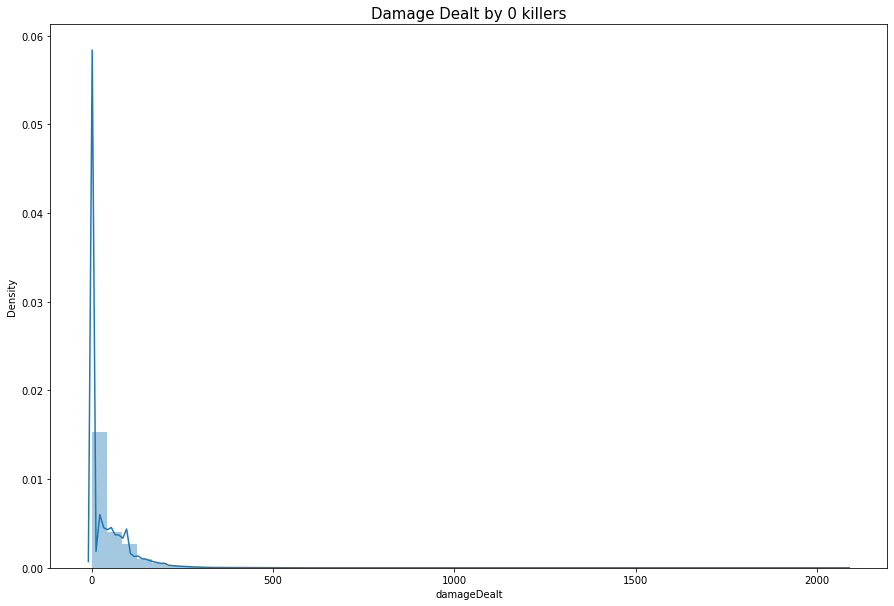

In [ ]:
data2 = data1.copy()
data2 = data2[data1['kills']==0]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data2['damageDealt'])

Most of the players who did not take a single kill, they not even dealt any damage

## Bivariate Analysis 

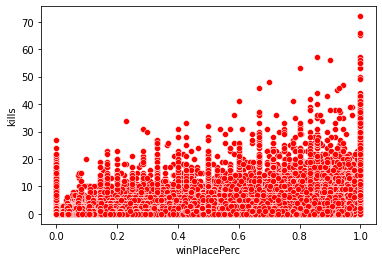

In [ ]:
sns.scatterplot(x="winPlacePerc", y="kills", color="r", data=data)

Number of kills has a positive corelation with a winning.

let's group players based on kills (0 kills, 1-2 kills, 3-5 kills, 6-10 kills and 10+ kills).

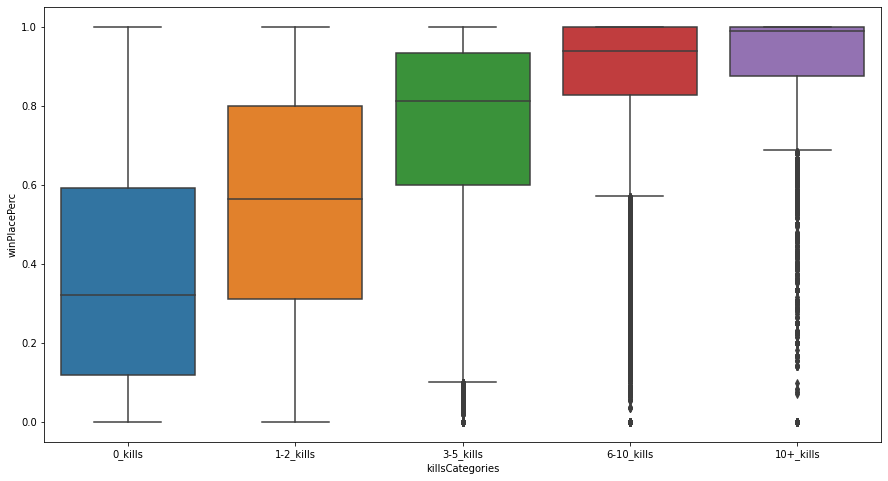

In [ ]:
kills = data.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)

We can see that if a player has more kills, the chance of winning is more.

In [ ]:
print("The average person walks for {:.1f}m, 99% of people have walked {}m or less, while the player keeps running ,walked for {}m.".format(data['walkDistance'].mean(), data['walkDistance'].quantile(0.99), data['walkDistance'].max()))

The average person walks for 1154.2m, 99% of people have walked 4396.0m or less, while the player keeps running ,walked for 25780.0m.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


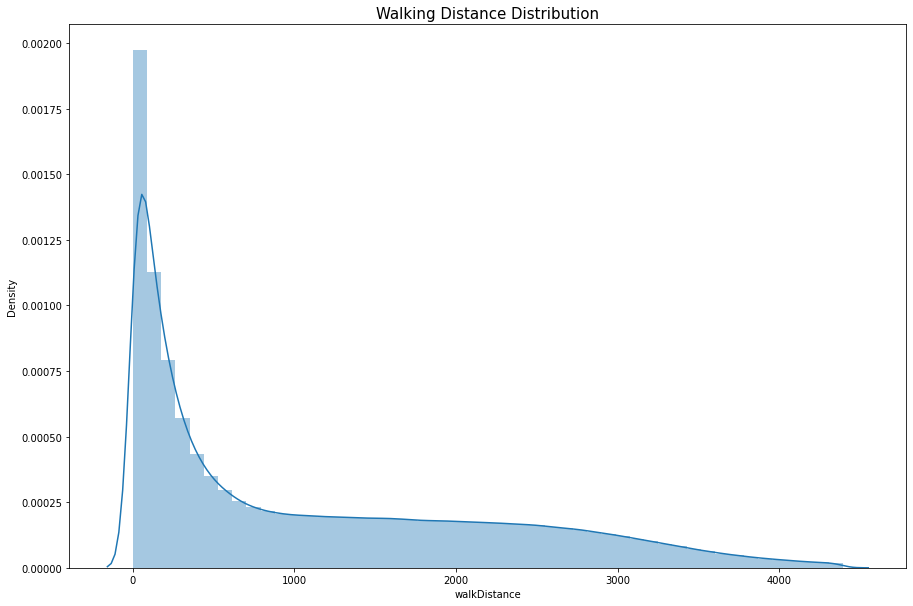

In [ ]:
data1 = data.copy()
data1 = data1[data1['walkDistance'] < data1['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data1['walkDistance'])

In [ ]:
print("{} players ({:.4f}%) walked 0 meters. This means that they die before even taking a step or they are afk (more possible).".format(len(data[data['walkDistance'] == 0]), 100*len(data1[data1['walkDistance']==0])/len(data)))

99602 players (2.2398%) walked 0 meters. This means that they die before even taking a step or they are afk (more possible).


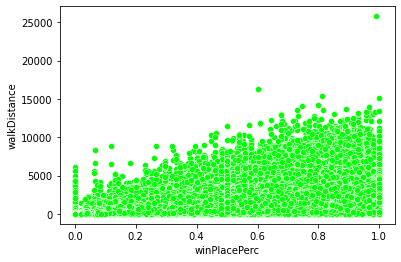

In [ ]:
sns.scatterplot(x="winPlacePerc", y="walkDistance",  data=data, color="lime")

walkDistance is corelated to winPlacepercentage bcoz a person has to walk(if he dint get vechicle) to enter the zone as the zone keeps on shrinking.

In [ ]:
print("The average person drives for {:.1f}m, 99% of people have drived {}m or less, while the formula 1 champion drived for {}m.".format(data1['rideDistance'].mean(), data1['rideDistance'].quantile(0.99), data1['rideDistance'].max()))

The average person drives for 601.5m, 99% of people have drived 6970.0m or less, while the formula 1 champion drived for 40710.0m.


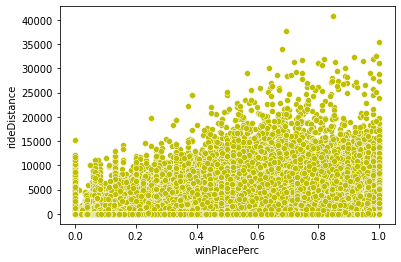

In [ ]:
sns.scatterplot(x="winPlacePerc", y="rideDistance", data=data,color="y")

rideDistance is highly corelated to winPlaceperc

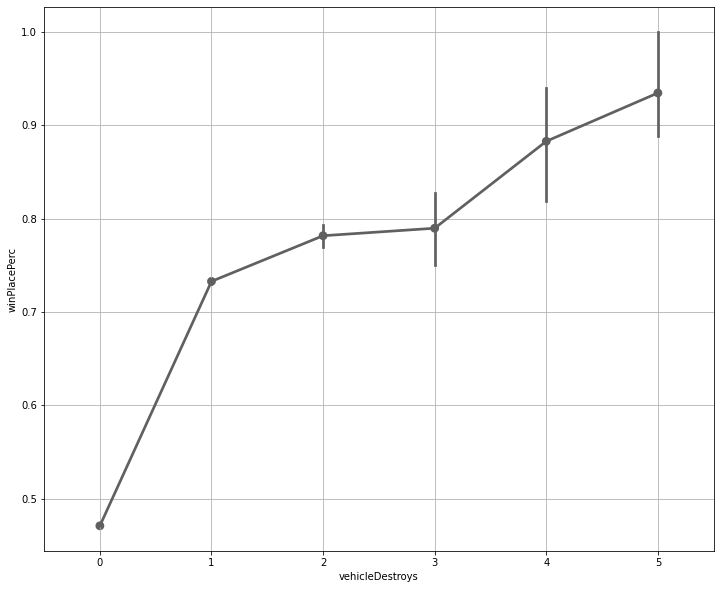

In [ ]:
plt.figure(figsize=(12,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='#606060',alpha=0.8)
plt.grid()

If a player is able to destroy more vechicle that means he has a good aim and the chances of winning increases for such player.

In [ ]:
print("The average person uses {:.1f} heal items, 99% of people use {} or less, while the doctor used {}.".format(data['heals'].mean(), data['heals'].quantile(0.99), data['heals'].max()))
print("The average person uses {:.1f} boost items, 99% of people use {} or less, while the doctor used {}.".format(data['boosts'].mean(), data['boosts'].quantile(0.99), data['boosts'].max()))

The average person uses 1.4 heal items, 99% of people use 12.0 or less, while the doctor used 80.
The average person uses 1.1 boost items, 99% of people use 7.0 or less, while the doctor used 33.


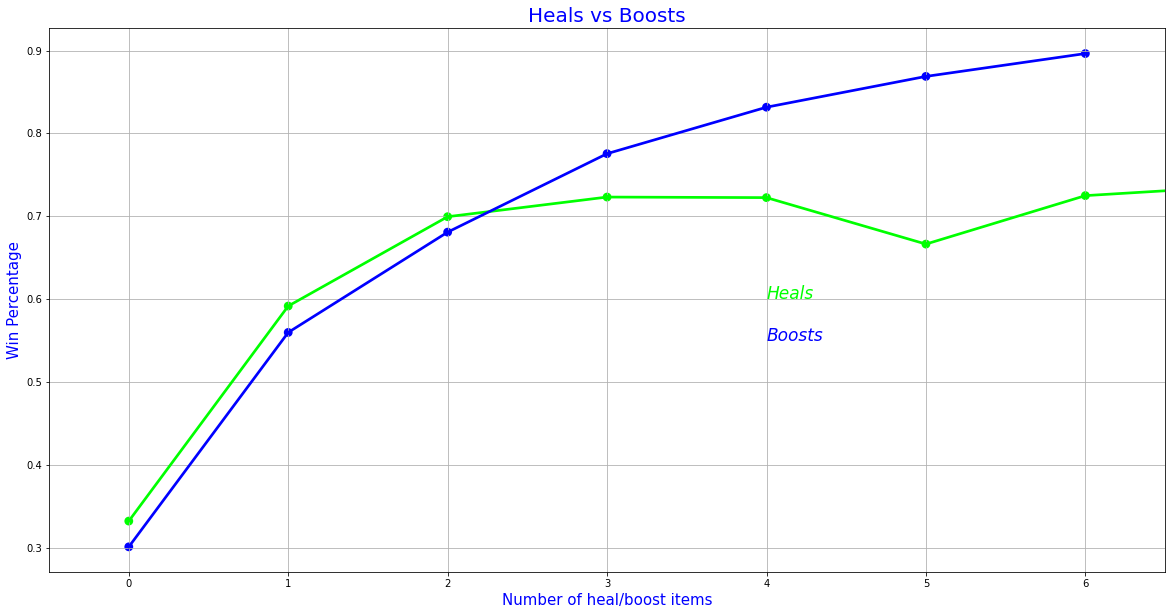

In [ ]:
data1 = data.copy()
data1 = data1[data1['heals'] < data1['heals'].quantile(0.99)]
data1 = data1[data1['boosts'] < data1['boosts'].quantile(0.99)]

plt.figure(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data1,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data1,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()

In order to survive in the game player needs more HP(hitpoint) and in order to increase HP the player must use heal/boost and if he survives till the end the chance of the player winning is more.

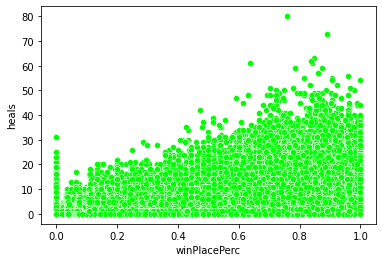

In [ ]:
sns.scatterplot(x="winPlacePerc", y="heals", data=data, color="lime")

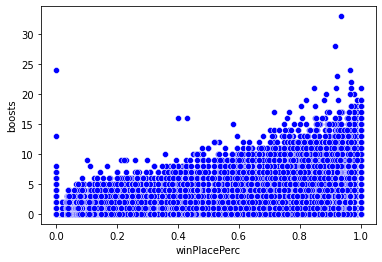

In [ ]:
sns.scatterplot(x="winPlacePerc", y="boosts", data=data, color="blue")

## Multivariate Analysis

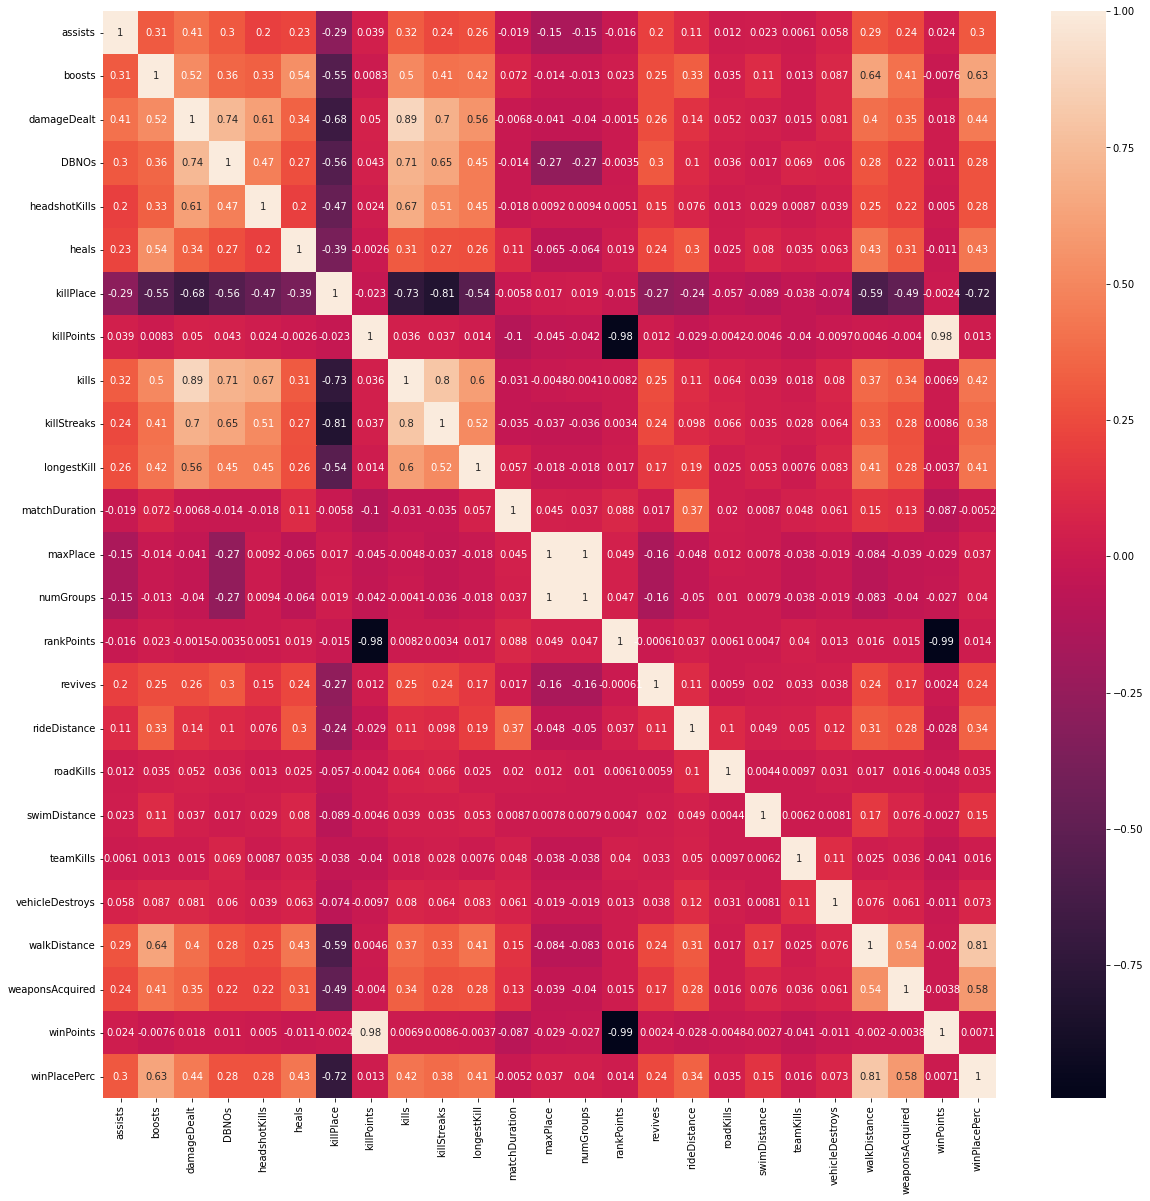

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, data=data)

The winPoints and KillPoints are strongly corelated,so one of those columns can be removed.

# 11.Data Preprocessing

In [ ]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

## Encoding Categorical variables into Numerical Variable 

In [ ]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [ ]:
data1 = pd.get_dummies(data,columns=['matchType'],drop_first=True)

In [ ]:
data1

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000000,0,0,0,60,1241,0,0,0.000000,1306,28,26,-1,0,0.0000,0,0.000,0,0,244.800003,1,1466,0.4444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470001,0,0,0,57,0,0,0,0.000000,1777,26,25,1484,0,0.0045,0,11.040,0,0,1434.000000,5,0,0.6400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000000,0,0,0,47,0,0,0,0.000000,1318,50,47,1491,0,0.0000,0,0.000,0,0,161.800003,2,0,0.7755,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900002,0,0,0,75,0,0,0,0.000000,1436,31,30,1408,0,0.0000,0,0.000,0,0,202.699997,3,0,0.1667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000000,0,0,0,45,0,1,1,58.529999,1424,97,95,1560,0,0.0000,0,0.000,0,0,49.750000,2,0,0.1875,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.000000,0,0,0,74,1029,0,0,0.000000,1873,29,28,-1,0,1292.0000,0,0.000,0,0,1019.000000,3,1507,0.1786,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.150002,0,0,0,69,0,0,0,0.000000,1435,93,93,1501,0,0.0000,0,0.000,0,0,81.699997,6,0,0.2935,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.060001,0,0,0,66,0,0,0,0.000000,1321,28,28,1500,0,0.0000,0,2.184,0,0,788.700012,4,0,0.4815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.399994,1,1,2,11,0,2,1,98.500000,1373,26,25,1418,2,0.0000,0,0.000,0,0,2748.000000,8,0,0.8000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# 12.Splitting into independent and dependent features.

In [ ]:
X = data1.drop(columns=['Id', 'groupId', 'matchId','winPlacePerc'])

In [ ]:
y= data1['winPlacePerc']

# Splitting into train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0.000000,0,0,0,60,1241,0,0,0.000000,1306,28,26,-1,0,0.0000,0,0.000,0,0,244.800003,1,1466,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,91.470001,0,0,0,57,0,0,0,0.000000,1777,26,25,1484,0,0.0045,0,11.040,0,0,1434.000000,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,68.000000,0,0,0,47,0,0,0,0.000000,1318,50,47,1491,0,0.0000,0,0.000,0,0,161.800003,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,32.900002,0,0,0,75,0,0,0,0.000000,1436,31,30,1408,0,0.0000,0,0.000,0,0,202.699997,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,100.000000,0,0,0,45,0,1,1,58.529999,1424,97,95,1560,0,0.0000,0,0.000,0,0,49.750000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.000000,0,0,0,74,1029,0,0,0.000000,1873,29,28,-1,0,1292.0000,0,0.000,0,0,1019.000000,3,1507,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4446962,0,1,44.150002,0,0,0,69,0,0,0,0.000000,1435,93,93,1501,0,0.0000,0,0.000,0,0,81.699997,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4446963,0,0,59.060001,0,0,0,66,0,0,0,0.000000,1321,28,28,1500,0,0.0000,0,2.184,0,0,788.700012,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4446964,0,4,180.399994,1,1,2,11,0,2,1,98.500000,1373,26,25,1418,2,0.0000,0,0.000,0,0,2748.000000,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
y

0          0.4444
1          0.6400
2          0.7755
3          0.1667
4          0.1875
            ...  
4446961    0.1786
4446962    0.2935
4446963    0.4815
4446964    0.8000
4446965    0.5464
Name: winPlacePerc, Length: 4446965, dtype: float32

# 13.Feature Scalling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[0.        , 0.03571429, 0.03411427, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01931681, ..., 0.        , 0.        ,
        1.        ],
       [0.09090909, 0.10714287, 0.02187122, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00760429, ..., 1.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
X_train.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'matchType_crashtpp', 'matchType_duo', 'matchType_duo-fpp',
       'matchType_flarefpp', 'matchType_flaretpp', 'matchType_normal-duo',
       'matchType_normal-duo-fpp', 'matchType_normal-solo',
       'matchType_normal-solo-fpp', 'matchType_normal-squad',
       'matchType_normal-squad-fpp', 'matchType_solo', 'matchType_solo-fpp',
       'matchType_squad', 'matchType_squad-fpp'],
      dtype='object')

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'matchType_crashtpp', 'matchType_duo', 'matchType_duo-fpp',
       'matchType_flarefpp', 'matchType_flaretpp', 'matchType_normal-duo',
       'matchType_normal-duo-fpp', 'matchType_normal-solo',
       'matchType_normal-solo-fpp', 'matchType_normal-squad',
       'matchType_normal-squad-fpp', 'matchType_solo', 'matchType_solo-fpp',
       'matchType_squad', 'matchType_squad-fpp']) 

In [ ]:
X_train_scaled

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0.000000,0.035714,0.034114,0.000000,0.000000,0.0375,0.575758,0.000000,0.000000,0.00,0.000000,0.863118,0.438776,0.434343,0.322957,0.000000,0.039622,0.0,0.000000,0.0,0.0,0.076571,0.033898,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.019317,0.018868,0.015625,0.1250,0.212121,0.000000,0.013889,0.05,0.008881,0.804182,0.275510,0.272727,0.250550,0.035714,0.052125,0.0,0.000000,0.0,0.0,0.092863,0.056497,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.090909,0.107143,0.021871,0.000000,0.000000,0.0125,0.343434,0.000000,0.000000,0.00,0.000000,0.787548,0.285714,0.282828,0.251734,0.071429,0.047482,0.0,0.000000,0.0,0.0,0.130683,0.039548,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.045455,0.071429,0.047325,0.037736,0.031250,0.0000,0.121212,0.627205,0.027778,0.05,0.200731,0.816540,0.438776,0.434343,0.000000,0.000000,0.106215,0.0,0.000000,0.0,0.0,0.054189,0.033898,0.745754,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0125,0.838384,0.603064,0.000000,0.00,0.000000,0.624525,0.255102,0.262626,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.003933,0.011299,0.703297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557567,0.000000,0.285714,0.004509,0.000000,0.000000,0.0250,0.404040,0.000000,0.000000,0.00,0.000000,0.562738,0.255102,0.262626,0.255625,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.079597,0.028249,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3557568,0.000000,0.035714,0.000000,0.000000,0.000000,0.0500,0.606061,0.000000,0.000000,0.00,0.000000,0.860741,0.959184,0.929293,0.255625,0.000000,0.002125,0.0,0.000000,0.0,0.0,0.040846,0.016949,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3557569,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.838384,0.000000,0.000000,0.00,0.000000,0.595057,0.255102,0.242424,0.251227,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3557570,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.636364,0.583565,0.000000,0.00,0.000000,0.858840,0.969388,0.969697,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.017785,0.033898,0.793706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
X_test_scaled = pd.DataFrame(X_test_scaled,columns=['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'matchType_crashtpp', 'matchType_duo', 'matchType_duo-fpp',
       'matchType_flarefpp', 'matchType_flaretpp', 'matchType_normal-duo',
       'matchType_normal-duo-fpp', 'matchType_normal-solo',
       'matchType_normal-solo-fpp', 'matchType_normal-squad',
       'matchType_normal-squad-fpp', 'matchType_solo', 'matchType_solo-fpp',
       'matchType_squad', 'matchType_squad-fpp']) 

In [ ]:
X_test_scaled

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0.090909,0.035714,0.009140,0.000000,0.000000,0.0000,0.616162,0.000000,0.000000,0.00,0.000000,0.589354,0.244898,0.252525,0.256471,0.0,0.004124,0.0,0.037279,0.0,0.0,0.044880,0.033898,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.107143,0.095979,0.000000,0.000000,0.0250,0.010101,0.463788,0.083333,0.05,0.250914,0.635932,0.989796,0.969697,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.073701,0.039548,0.747752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.214286,0.015115,0.000000,0.000000,0.1250,0.252525,0.000000,0.013889,0.05,0.004570,0.821768,0.969388,0.929293,0.261208,0.0,0.023235,0.0,0.000000,0.0,0.0,0.157525,0.016949,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000000,0.000000,0.007346,0.000000,0.000000,0.0000,0.808081,0.000000,0.000000,0.00,0.000000,0.587452,0.285714,0.262626,0.252411,0.0,0.000000,0.0,0.000000,0.0,0.0,0.004616,0.005650,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.107143,0.002916,0.000000,0.000000,0.0125,0.545455,0.523213,0.000000,0.00,0.000000,0.585551,0.959184,0.959596,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.057758,0.028249,0.712787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889388,0.090909,0.071429,0.067639,0.037736,0.000000,0.0250,0.030303,0.000000,0.055556,0.05,0.132450,0.582224,0.275510,0.282828,0.267298,0.0,0.000000,0.0,0.000000,0.0,0.0,0.098293,0.016949,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889389,0.000000,0.000000,0.060459,0.000000,0.015625,0.0000,0.050505,0.610028,0.055556,0.05,0.039899,0.587452,0.989796,0.939394,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.059038,0.022599,0.749251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
889390,0.000000,0.000000,0.014299,0.000000,0.000000,0.0000,0.757576,0.457753,0.000000,0.00,0.000000,0.598384,0.295918,0.282828,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.009977,0.016949,0.734765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
889391,0.000000,0.000000,0.013733,0.000000,0.000000,0.0000,0.666667,0.000000,0.000000,0.00,0.000000,0.604087,0.948980,0.919192,0.257317,0.0,0.000000,0.0,0.000000,0.0,0.0,0.005966,0.016949,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#14.Model Selection

## 1.LinearRegression

## Importing Models

In [ ]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# Model Training

In [ ]:
LR = LinearRegression()
LR.fit(X_train_scaled,y_train)

LinearRegression()

## Model Evaluation

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_predict = LR.predict(X_test_scaled)

In [ ]:
accuracy = r2_score(y_test,y_predict)
print(accuracy)

0.8398696900486537


# 2.XGBRegressor

## Model Training

In [ ]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train_scaled,y_train)

[10:13:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=42)

## Model Evaluation

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_predict = xgb.predict(X_test_scaled)
accuracy = r2_score(y_test,y_predict)
print(accuracy)

0.8991306502312224


# 15.Conclusion

On Comparing the r2 scores of linear regression and xgb regressor we got a better accuracy of 89.91% so we conclude that xgb regressor is the best model for predicting winner place percentage in this Project



# 16.Challenges Faced

Challenges Faced 
one and only major challenge faced by us was the size of the data was big
we tried to tackle the problem by Reducing the memory usage by downcasting the data 

The dataset has 4446966 rows × 29 columns of data and the size of the file is 983.90 Mb. Since the data was so large, memory usage became an issue. We utilized memory reduction techniques to downcast data types like int64,int32 to int16,int8 and float64 to float32 resulting in a 65.5% memory reduction.that decreses the file size from 983.90 MB to 339.28 MB.

and as the data was so big the google colab notebook was getting crashed because all the alloted ram was getting used when we tried to hypertune the model. so we did not hypertune the model